In [1]:
import os
import numpy as np
import random
import copy

import matplotlib.pyplot as plt
plt.rc("font", size=8)

import seaborn as sns
# import matplotlib.pylab as plt

from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader

from dataloader import ReverseDataset
from models import RNNEncoder, RNNDecoder, Seq2SeqAttn
from data_utils import pad_collate

In [2]:
k = ReverseDataset()

k_dataloader = DataLoader(
    k,
    batch_size=2,
    shuffle=False,
    num_workers=0,
    drop_last=True,
    collate_fn=pad_collate,
)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
e = RNNEncoder(input_dim=1)
d= RNNDecoder(input_dim=(e.input_size + e.hidden_size), hidden_size= e.hidden_size)

model = Seq2SeqAttn(encoder=e, decoder=d).to(device)
model.load_state_dict(torch.load("seq2seq_all_attn_weights_100.pt"))

<All keys matched successfully>

In [4]:
for x, y, lens in k_dataloader:
    x, y = x.to(device), y.to(device)
    decoded_rev, all_attn = model(x, lens)
    break

In [18]:
def plot_attn(x, y, all_attn, lens):
    longest_seq_index = torch.argmax(lens).item()
    attn_matrix = all_attn[:, longest_seq_index, :].detach().cpu().numpy()
    ax = sns.heatmap(attn_matrix, linewidth=0.5)
    img_name = "1_attn_weights.png"
    ax.figure.savefig(img_name)

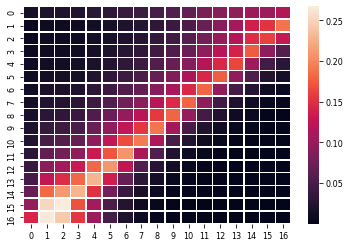

In [19]:
plot_attn(x, y, all_attn, lens)

In [25]:
decoded_rev[0]

tensor([[0.3907],
        [0.4869],
        [0.4944],
        [0.7175],
        [0.1620],
        [0.8017],
        [0.7655],
        [0.8868],
        [0.8743],
        [0.5867],
        [0.3088],
        [0.5030],
        [0.8965],
        [0.8848],
        [0.3936],
        [0.7878],
        [0.3068],
        [0.8691],
        [0.0271],
        [0.0050]], device='cuda:0', grad_fn=<SelectBackward>)

In [46]:
x[1].view(-1)*10

tensor([5., 3., 5., 1., 2., 1., 3., 3., 5., 3., 8., 6., 7., 3., 4., 3., 8., 2.,
        1., 3.], device='cuda:0')

In [10]:
all_attn.shape

torch.Size([20, 2, 20])

In [28]:
first_attn = all_attn[:, 1, :]

In [13]:
first_attn.shape

torch.Size([20, 20])

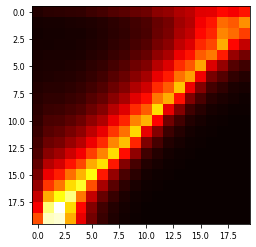

In [30]:
plt.imshow(first_attn.detach().cpu().numpy(), cmap='hot')
plt.show()

In [16]:
y[0]

tensor([[0.4000],
        [0.5000],
        [0.5000],
        [0.7000],
        [0.2000],
        [0.8000],
        [0.8000],
        [0.9000],
        [0.9000],
        [0.6000],
        [0.3000],
        [0.5000],
        [0.9000],
        [0.9000],
        [0.4000],
        [0.8000],
        [0.3000],
        [0.9000],
        [0.0000],
        [0.0000]], device='cuda:0')

In [ ]:
drop_z_first_attn = first_attn[]

In [20]:
k = np.arange(25).reshape((5,5))

In [21]:
k[:3, :3]

array([[ 0,  1,  2],
       [ 5,  6,  7],
       [10, 11, 12]])

In [22]:
k

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [27]:
lens

tensor([18., 20.])